In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sum
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller
sns.set_theme()

In [11]:

df= pd.read_csv("monthly-sunspots.csv",parse_dates=[0],index_col=[0])

In [12]:
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


Text(0.5, 1.0, 'Montly sunspots data')

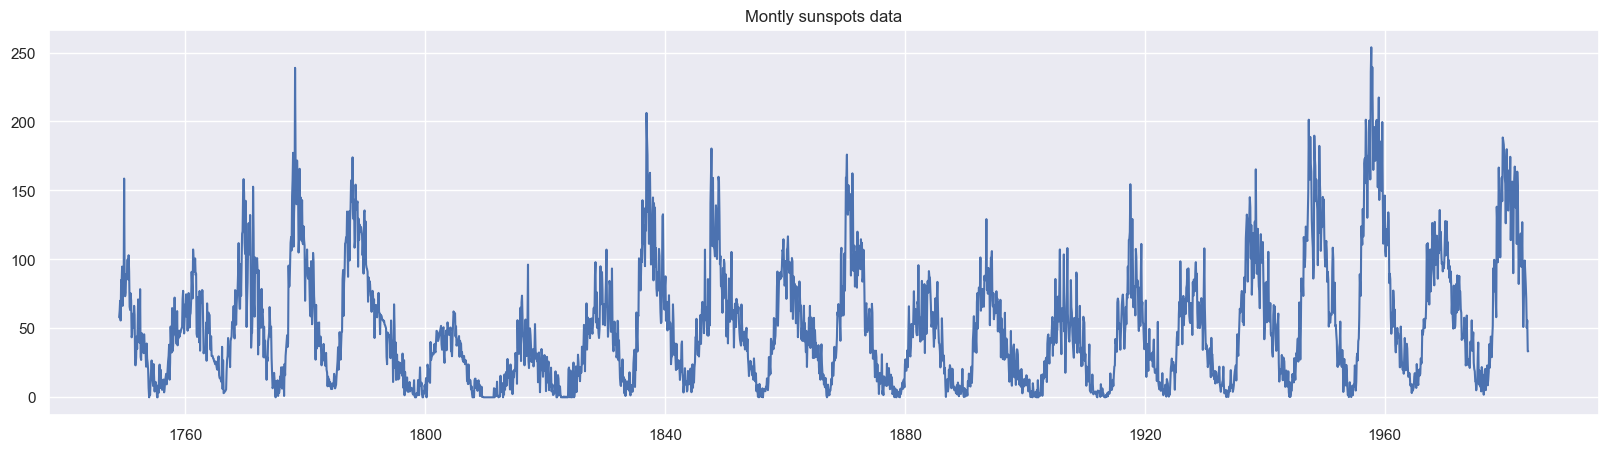

In [16]:
plt.figure(figsize=(20,5))
plt.plot(df)
plt.title("Montly sunspots data")

In [18]:
dfq= df.resample('q').mean()
dfq.head()

,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667


Text(0.5, 1.0, 'Quarterly sunspots data')

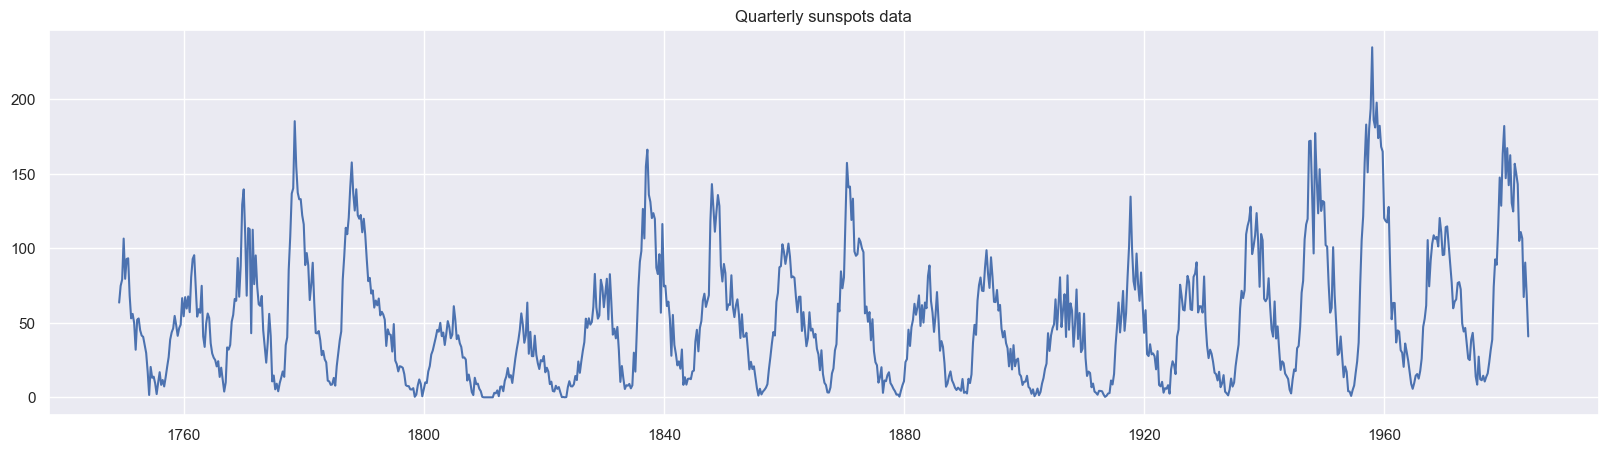

In [19]:
plt.figure(figsize=(20,5))
plt.plot(dfq)
plt.title("Quarterly sunspots data")

In [23]:
adf= adfuller(dfq)
if(adf[1]<.05):
    print("The data is not stationary")
    print("the p value is ", adf[1])

The data is not stationary
the p value is  8.522745073376522e-17


In [25]:
dfq["shifted quaterly sunspot numbers"]= dfq["Sunspots"].shift(1)

<Axes: xlabel='Month'>

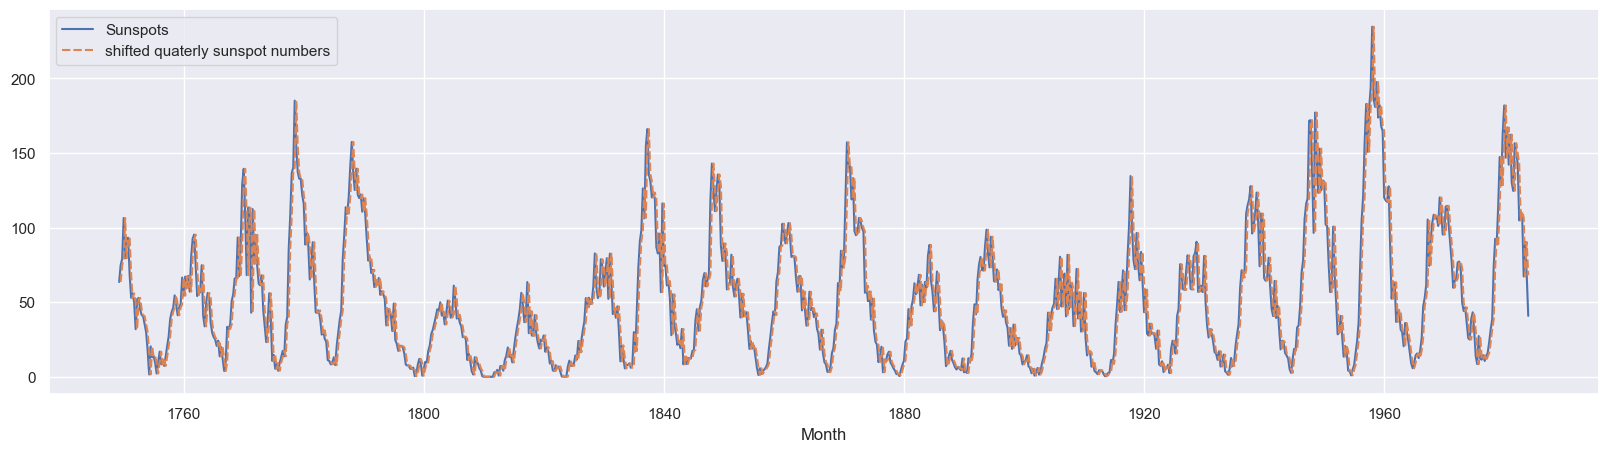

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(dfq)

In [28]:
dfq= dfq.dropna()

In [30]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(dfq["Sunspots"],dfq["shifted quaterly sunspot numbers"]))

238.70118210862617


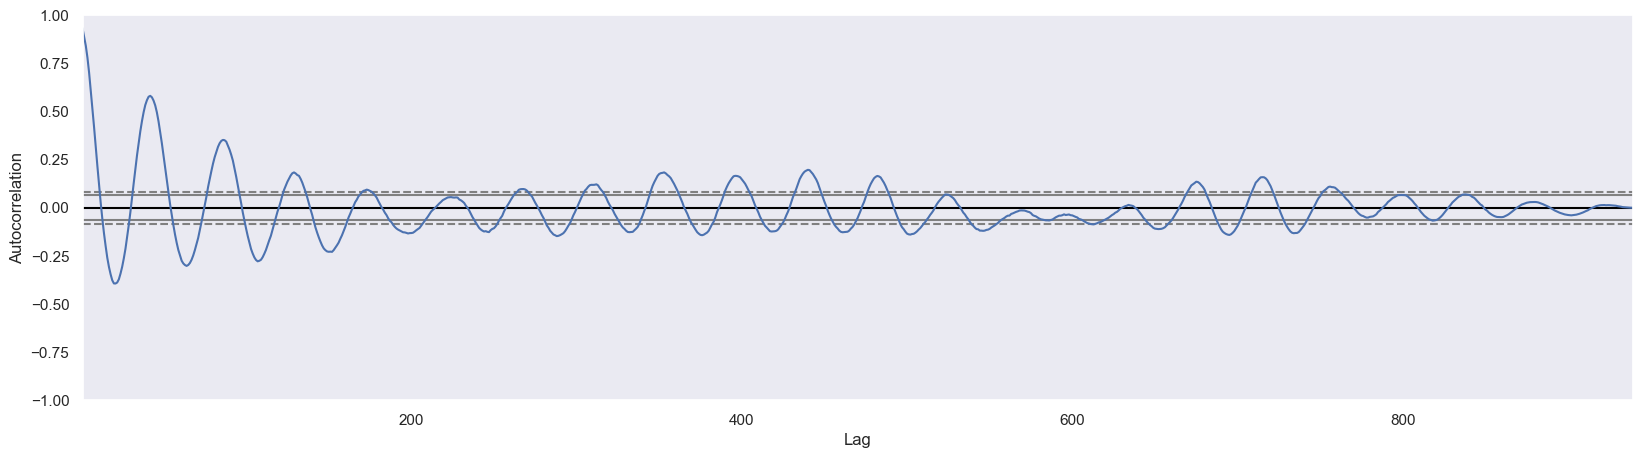

In [31]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,5))
autocorrelation_plot(dfq)
plt.show()

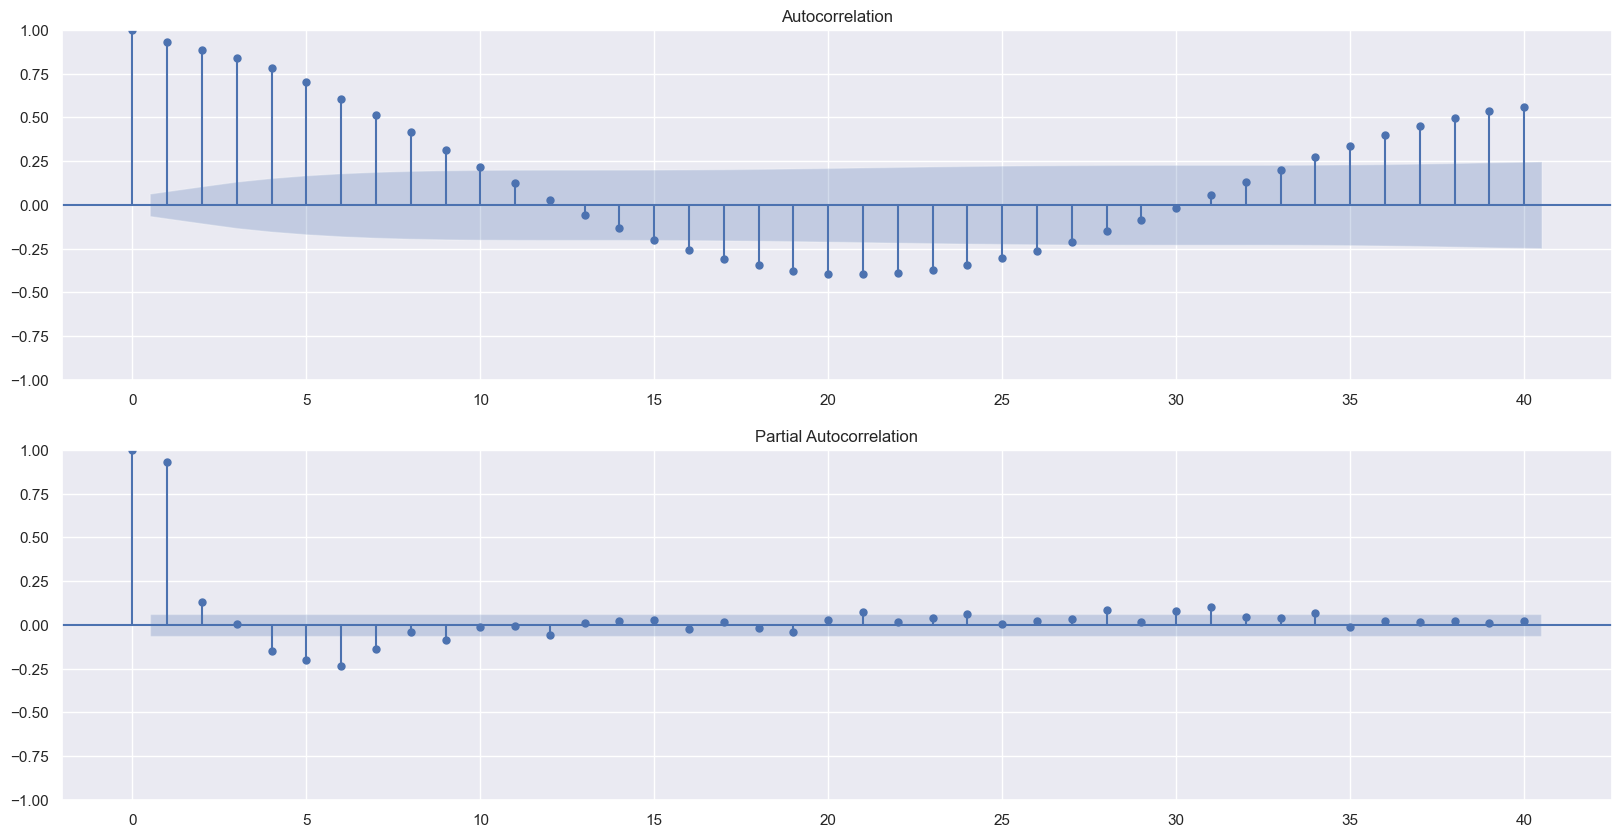

In [34]:
fig= plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig= sum.graphics.tsa.plot_pacf(dfq["Sunspots"],lags=40,ax=ax2)
fig= sum.graphics.tsa.plot_acf(dfq["Sunspots"],lags=40,ax=ax1)

In [35]:
model= sum.tsa.statespace.SARIMAX(dfq["Sunspots"],order=(2,0,2),seasonal_order=(2,0,2,6))
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49051D+00    |proj g|=  6.59826D-01

At iterate    5    f=  4.13779D+00    |proj g|=  2.00407D-02

At iterate   10    f=  4.12223D+00    |proj g|=  1.74358D-02

At iterate   15    f=  4.11497D+00    |proj g|=  6.56275D-02

At iterate   20    f=  4.10983D+00    |proj g|=  6.49917D-03

At iterate   25    f=  4.10901D+00    |proj g|=  1.29807D-02

At iterate   30    f=  4.10844D+00    |proj g|=  4.04661D-03

At iterate   35    f=  4.10694D+00    |proj g|=  1.13583D-02

At iterate   40    f=  4.10577D+00    |proj g|=  4.24726D-03

At iterate   45    f=  4.10520D+00    |proj g|=  3.60720D-03

At iterate   50    f=  4.10519D+00    |proj g|=  9.58428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  939
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -3854.777
Date:                           Thu, 21 Mar 2024   AIC                           7727.555
Time:                                   13:47:16   BIC                           7771.158
Sample:                               06-30-1749   HQIC                          7744.178
                                    - 12-31-1983                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7999      0.072     25.165      0.000       1.660       1.940
ar.L2         -0.8019      0.072    -11.196      0.000      -0.942      -0.662
ma.L1         -1.1192      0.069    -16.311      0.000      -1.254      -0.985
ma.L2          0.3490      0.024     14.305      0.000       0.301       0.397
ar.S.L6        1.2799      0.040     32.004      0.000       1.202       1.358
ar.S.L12      -0.9301      0.040    -23.178      0.000      -1.009      -0.851
ma.S.L6       -1.2869      0.049    -26.194      0.000      -1.383      -1.191
ma.S.L12       0.8884      0.048     18.518      0.000       0.794       0.982
sigma2       212.6777      7.176     29.638      0.000     198.613     226.742
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):               131.33
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

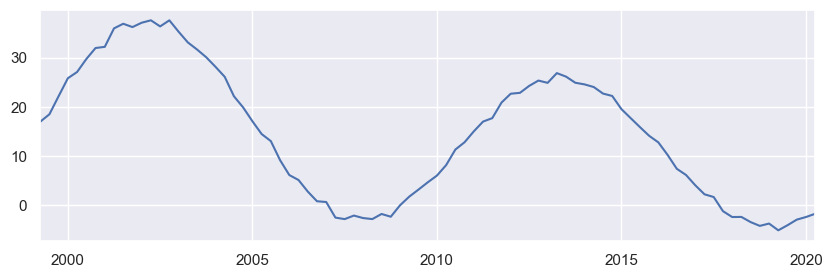

In [39]:
results.predict(start=1000,end=1084,dynamic=True).plot(figsize=(10,3))